# A notebook for extracting datasets into a central location


In [45]:
%matplotlib inline
import torch
import torchvision

import matplotlib.pyplot as plt
import numpy as np
# Location to store dataset
data_path = 'C:\\Users\\Kyle\\Documents\\GitHub\\data\\'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device: ', device)

device:  cuda:0


## CIFAR 10

In [65]:

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img, title):
    npimg = img.numpy()
    # Display image by reordering channels to match pyplot's expectation
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.title(title)

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

train_set = torchvision.datasets.CIFAR10(data_path, train=True, download=True,  transform=transform)
val_set = torchvision.datasets.CIFAR10(data_path, train=False, download=True,  transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [78]:
# use np.concatenate to stick all the images together to form a 1600000 X 32 X 32 array
x = np.concatenate([np.asarray(train_set[i][0]) for i in range(len(train_set))])
# print(x)
print(x.shape)
# calculate the mean and std along the (0, 1) axes
train_mean = np.mean(x, axis=(0, 1))
train_std = np.std(x, axis=(0, 1))
# the the mean and std
print(train_mean, train_std)


(150000, 32, 32)
[0.4892156  0.4799583  0.4770599  0.4744838  0.47282225 0.47205546
 0.47175387 0.47162506 0.47163022 0.47176442 0.47198546 0.47189593
 0.47164953 0.4714962  0.47117677 0.47079468 0.4707822  0.47099775
 0.4712962  0.47164708 0.47162515 0.4716115  0.471716   0.47187334
 0.47182718 0.4720563  0.4721516  0.47262448 0.4740014  0.4761055
 0.47905672 0.484375  ] [0.26383403 0.2584018  0.2559357  0.25401574 0.25238773 0.2514551
 0.25027016 0.2497239  0.24873556 0.24841724 0.24767739 0.24764736
 0.24709296 0.24677129 0.24649623 0.24674024 0.24670573 0.2466548
 0.24694973 0.24737765 0.24807914 0.24809797 0.24881217 0.24903877
 0.25002226 0.2504571  0.25183108 0.25274402 0.2542824  0.2556968
 0.25747424 0.26130033]


tensor([1.0883e-05, 1.0164e-05, 9.9836e-06])


tensor([[[0.1961, 0.2000, 0.1647,  ..., 0.1882, 0.0706, 0.0549],
         [0.3373, 0.3608, 0.3216,  ..., 0.1804, 0.0667, 0.0431],
         [0.1686, 0.1686, 0.2000,  ..., 0.1647, 0.0392, 0.0235],
         ...,
         [0.8627, 0.8196, 0.7804,  ..., 0.6941, 0.6902, 0.6863],
         [0.7373, 0.7137, 0.7137,  ..., 0.6902, 0.6863, 0.6824],
         [0.7373, 0.7216, 0.7294,  ..., 0.6902, 0.6902, 0.6784]],

        [[0.2510, 0.2471, 0.2157,  ..., 0.1765, 0.0706, 0.0588],
         [0.4196, 0.4314, 0.3882,  ..., 0.1686, 0.0667, 0.0471],
         [0.2353, 0.2196, 0.2549,  ..., 0.1529, 0.0392, 0.0235],
         ...,
         [0.6471, 0.6824, 0.6745,  ..., 0.6706, 0.6667, 0.6588],
         [0.6980, 0.6667, 0.6314,  ..., 0.6588, 0.6549, 0.6510],
         [0.6549, 0.6392, 0.6549,  ..., 0.6627, 0.6588, 0.6471]],

        [[0.1451, 0.1608, 0.1608,  ..., 0.1647, 0.0549, 0.0471],
         [0.2627, 0.2980, 0.2627,  ..., 0.1608, 0.0549, 0.0392],
         [0.1647, 0.1608, 0.1804,  ..., 0.1451, 0.0353, 0.

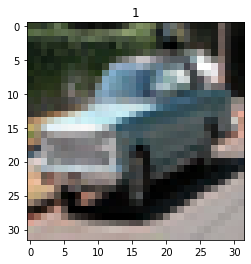

In [67]:
img, label = trainset_cifar[32]
print(img)
imshow(img, label)